### Importación de datos



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

url_1 = "https://raw.githubusercontent.com/Blackpachamame/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_1.csv"
url_2 = "https://raw.githubusercontent.com/Blackpachamame/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url_3 = "https://raw.githubusercontent.com/Blackpachamame/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url_4 = "https://raw.githubusercontent.com/Blackpachamame/challenge-alura-store/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda_1 = pd.read_csv(url_1)
tienda_2 = pd.read_csv(url_2)
tienda_3 = pd.read_csv(url_3)
tienda_4 = pd.read_csv(url_4)

tienda_1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## 1. Análisis de facturación

In [2]:
tiendas = [tienda_1, tienda_2, tienda_3, tienda_4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
bar_colors = ['#dadaeb', '#bcbddc', '#9e9ac8', '#756bb1']

ingresos_totales = [sum(tienda['Precio']) for tienda in tiendas]
print(ingresos_totales)

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]


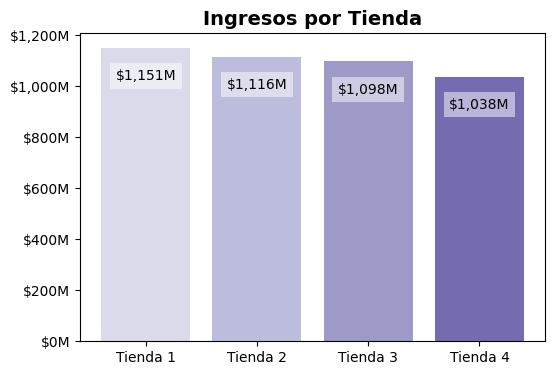

In [3]:
# Definición de las variables a ser graficadas
x = nombres
y = ingresos_totales

# Aplicar formato a números
def millones(x, pos=None):
    """
    Esta función convierte un número y le da formato de millones (M) sin decimales
    """
    return f'${x/1_000_000:,.0f}M'

# Realizar gráfica de suma total de ventas por tienda
fig, ax = plt.subplots(figsize = (6,4))
ax.bar(x, y, color = bar_colors)

# Uso de la función millones para formatear números en el eje y
ax.yaxis.set_major_formatter(FuncFormatter(millones))

ax.set_title("Ingresos por Tienda", fontsize=14, fontweight='bold')

# Generar etiquetas en las barras
# Uso de la función millones para formatear las etiquetas de las barras
for i, v in enumerate(y):
    ax.text(i, v - 110_000_000, millones(v),
        ha='center', va='center',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'edgecolor': 'None'})

plt.show()


## 2. Ventas por categoría

In [4]:
def obtener_ventas_por_cat(tienda):
    cantidad = tienda.groupby('Categoría del Producto').size()
    suma_precios = tienda.groupby('Categoría del Producto')['Precio'].sum()
    
    resumen = pd.DataFrame({
        'Cantidad de productos vendidos': cantidad,
        'Suma total de precios': suma_precios
    }).sort_values(by='Cantidad de productos vendidos', ascending=False)
    
    return resumen


ventas_por_cat = [obtener_ventas_por_cat(tienda) for tienda in tiendas]
ventas_por_cat

[                         Cantidad de productos vendidos  Suma total de precios
 Categoría del Producto                                                        
 Muebles                                             465            187633700.0
 Electrónicos                                        448            429493500.0
 Juguetes                                            324             17995700.0
 Electrodomésticos                                   312            363685200.0
 Deportes y diversión                                284             39290000.0
 Instrumentos musicales                              182             91299000.0
 Libros                                              173              8784900.0
 Artículos para el hogar                             171             12698400.0,
                          Cantidad de productos vendidos  Suma total de precios
 Categoría del Producto                                                        
 Muebles                               

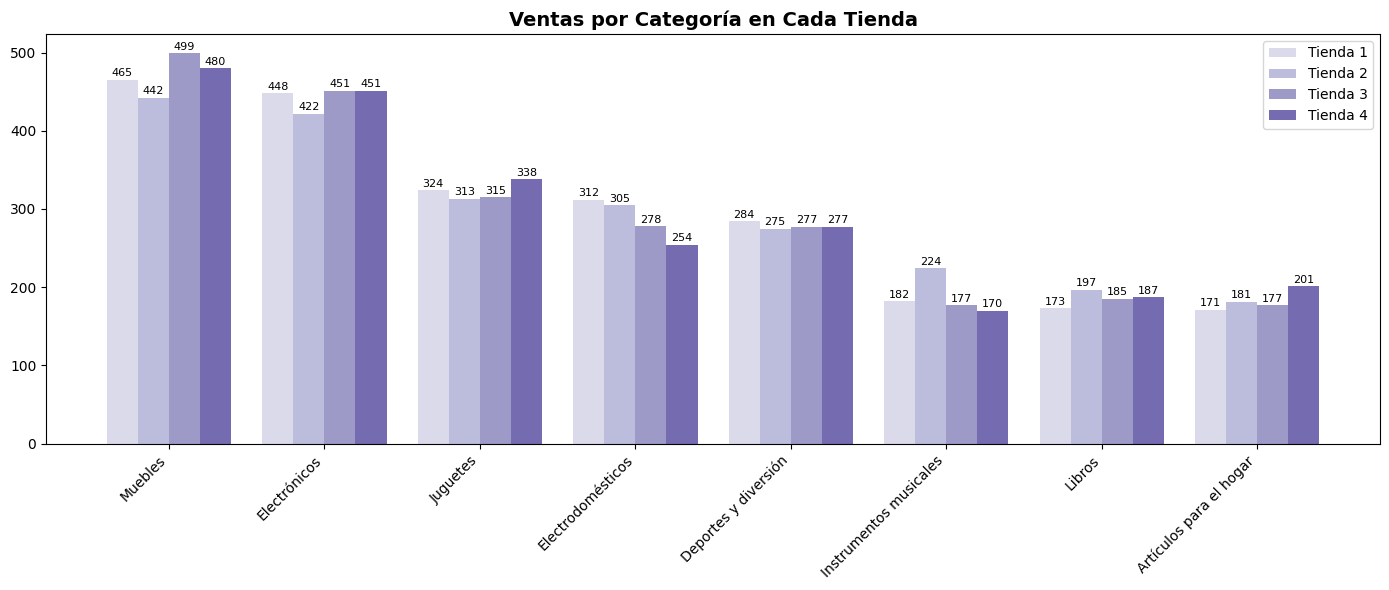

In [5]:
# Categorías (ordenadas como en la primera tienda)
categorias = ventas_por_cat[0].index.tolist()
n_categorias = len(categorias)
n_tiendas = len(ventas_por_cat)

# Valores por tienda por categoría (solo cantidad de productos vendidos)
valores = [
    [ventas.loc[cat, 'Cantidad de productos vendidos'] for cat in categorias]
    for ventas in ventas_por_cat
]

# Posiciones X y ancho de barras
x = np.arange(n_categorias)
width = 0.2

# Crear gráfico
fig, ax = plt.subplots(figsize=(14, 6))

# Dibujar barras y etiquetas
for i in range(n_tiendas):
    bars = ax.bar(x + i * width, valores[i], width, label=nombres[i], color=bar_colors[i])
    
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 2,
            f'{int(height)}',
            ha='center', va='bottom', fontsize=8
        )

# Etiquetas y formato
ax.set_title('Ventas por Categoría en Cada Tienda', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * (n_tiendas - 1) / 2)
ax.set_xticklabels(categorias, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()

## 3. Calificación promedio de la tienda

In [6]:
calificacion_promedio = [round(sum(tienda['Calificación'])/len(tienda['Calificación']), 2) for tienda in tiendas]
calificacion_promedio

[3.98, 4.04, 4.05, 4.0]

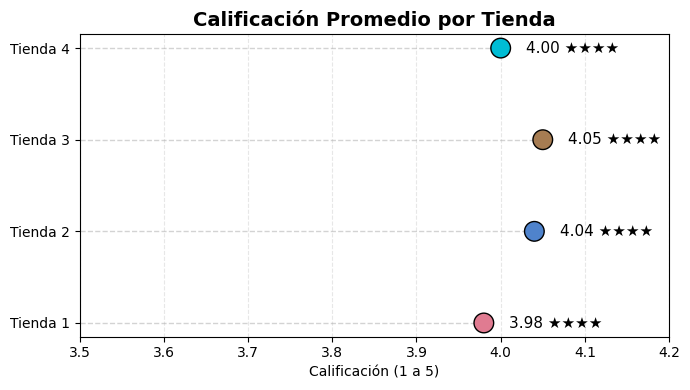

In [7]:
colores = ['#e07b91', '#4f83cc', '#a67c52', '#00bcd4']  # Personaliza si quieres

fig, ax = plt.subplots(figsize=(7, 4))

# Gráfico de puntos
ax.scatter(calificacion_promedio, nombres, color=colores, s=200, edgecolor='black', zorder=3)

# Líneas guía horizontales (opcionales, para estética)
for i, cal in enumerate(calificacion_promedio):
    ax.hlines(y=nombres[i], xmin=3.5, xmax=cal, color='lightgray', linestyle='--', linewidth=1, zorder=1)

# Etiquetas con estrellas
for i, cal in enumerate(calificacion_promedio):
    estrellas = int(round(cal)) * '★'
    ax.text(cal + 0.03, nombres[i], f'{cal:.2f} {estrellas}', va='center', fontsize=11)

# Estética del gráfico
ax.set_xlim(3.5, 4.2)
ax.set_xlabel('Calificación (1 a 5)')
ax.set_title('Calificación Promedio por Tienda', fontsize=14, fontweight='bold')
ax.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## 4. Productos más y menos vendidos

In [8]:
def obtener_cantidad_producto(tienda):
    return tienda.groupby('Producto').size().sort_values(ascending=False).to_dict()

cantidad_de_productos = [obtener_cantidad_producto(tienda) for tienda in tiendas]

In [9]:
# Extraer el producto más y menos vendido de cada tienda
productos_extremos = []

for tienda in cantidad_de_productos:
    producto_max = max(tienda, key=tienda.get)
    producto_min = min(tienda, key=tienda.get)
    productos_extremos.append({
        'max_producto': producto_max,
        'max_valor': tienda[producto_max],
        'min_producto': producto_min,
        'min_valor': tienda[producto_min]
    })

# Preparar datos para el gráfico
max_productos = [item['max_producto'] for item in productos_extremos]
max_valores = [item['max_valor'] for item in productos_extremos]

min_productos = [item['min_producto'] for item in productos_extremos]
min_valores = [item['min_valor'] for item in productos_extremos]

# Crear tabla resumen con nombres completos
tabla_resumen = pd.DataFrame({
    'Tienda': nombres,
    'Producto más vendido': max_productos,
    'Cantidad (más vendido)': max_valores,
    'Producto menos vendido': min_productos,
    'Cantidad (menos vendido)': min_valores
})

# Mostrar tabla
print("Resumen de productos más y menos vendidos por tienda:")
display(tabla_resumen)


Resumen de productos más y menos vendidos por tienda:


,Tienda,Producto más vendido,Cantidad (más vendido),Producto menos vendido,Cantidad (menos vendido)
0,Tienda 1,Armario,60,Celular ABXY,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


## 5. Envío promedio por tienda

In [10]:
envio_promedio = [round(tienda['Costo de envío'].mean(), 2) for tienda in tiendas]
print(envio_promedio)

[np.float64(26018.61), np.float64(25216.24), np.float64(24805.68), np.float64(23459.46)]


## Resumen

In [11]:
resumen_tiendas = []

for i, tienda in enumerate(tiendas):
    nombre = nombres[i]
    
    productos_vendidos = len(tienda)
    ingresos = tienda['Precio'].sum()
    costo_envio_total = tienda['Costo de envío'].sum()
    ganancia_neta = ingresos - costo_envio_total
    ticket_prom = tienda['Precio'].mean()
    calificacion_prom = tienda['Calificación'].mean()
    envio_prom = tienda['Costo de envío'].mean()
    
    resumen_tiendas.append({
        'Tienda': nombre,
        'Productos Vendidos': productos_vendidos,
        'Ingresos Totales ($)': round(ingresos, 2),
        'Costo Envío Total ($)': round(costo_envio_total, 2),
        'Ganancia Neta ($)': round(ganancia_neta, 2),
        'Ticket Promedio ($)': round(ticket_prom, 2),
        'Calificación Promedio': round(calificacion_prom, 2),
        'Envío Promedio ($)': round(envio_prom, 2)
    })

# Crear DataFrame
df_resumen = pd.DataFrame(resumen_tiendas)

# Ordenar por ganancia neta (opcional)
df_resumen = df_resumen.sort_values(by='Ganancia Neta ($)', ascending=False)

# Mostrar tabla
df_resumen.reset_index(drop=True, inplace=True)
df_resumen


,Tienda,Productos Vendidos,Ingresos Totales ($),Costo Envío Total ($),Ganancia Neta ($),Ticket Promedio ($),Calificación Promedio,Envío Promedio ($)
0,Tienda 1,2359,1.150880e+09,61377900.0,1.089502e+09,487867.91,3.98,26018.61
1,Tienda 2,2359,1.116344e+09,59485100.0,1.056858e+09,473227.43,4.04,25216.24
2,Tienda 3,2359,1.098020e+09,58516600.0,1.039503e+09,465459.77,4.05,24805.68
3,Tienda 4,2358,1.038376e+09,55317400.0,9.830583e+08,440362.89,4.00,23459.46


## Recomendación

La Tienda 4 es la menos rentable de las 4, con la ganancia neta más baja, el ticket promedio más bajo y una calificación un poco por debajo de las otras tiendas. Por estos motivos, se recomienda que el Sr. Juan considere vender Tienda 4 para liberar recursos y mejorar la eficiencia de la empresa.